In [1]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
best_model_weight=[None]
best_model_cv_loss=[None]
best_model_degree=[None]
def norm(input):
    input=input-input.mean(axis=0)
    input=input/input.std(axis=0)
    return input

np.set_printoptions(precision=3)

We will do normalization before call this function. and inside this function, we will choose the best model with the lowest cv loss.
and we will output the weight and loss of the linear model of the global variale do_print is true.


In [2]:
## we will not do normalization inside this function, please do nomalization outside this functiuon
do_print=False
def my_regression(trainX,testX,noutputs):
    phi=None
    phi=trainX[:,0:trainX.shape[1]-noutputs]

    T=trainX[:,trainX.shape[1]-noutputs:]
    # try different model 
    poly_degree=(1,2,3,4,5,6) # 1 for linear model,2~6 for poly model
    m_lambda=(0,0.0001,0.001,0.01,0.1,1,10,100,1000) # 0 for no regular, 

    # using different method to build the input for different modle
    models_map=dict() # record all the models and cv loss
    for t_poly in poly_degree: # test every poly degree
        #print("degree = %d"%(t_poly))
        phi=trainX[:,0:trainX.shape[1]-noutputs]
        #print("trainX:",trainX)
        #print("phi",phi)
        # build poly input
        poly=PolynomialFeatures(t_poly)
        phi=poly.fit_transform(phi) # the fist column is all one
        min_loss=float("inf")
        for t_lambda in m_lambda: #test every lambda for
            if do_print and t_poly==1 and t_lambda==0:
                print("start cv at linear base function, the weight and loss are showed:   ")
            #print("lmbda=",t_lambda)
            cv=np.array([])
            for cross_valid in range(5):# cross validation
                total=len(phi)
                start=int(total*cross_valid/5)
                end=int(total*(cross_valid+1)/5)
                if start==end:
                    end=end+1
                test_case=phi[start:end]
                #print("phi",phi)
                train_case=np.append(phi[0:start],phi[end:],axis=0)
                test_T=T[start:end]
                train_T=np.append(T[0:start],T[end:],axis=0)
                #print("train case",train_case)
                #if len(train_case)==1:
                #    W=np.dot(np.linalg.pinv(train_case),train_T)
                #else:
                #    W=np.dot(np.dot(np.linalg.inv( t_lambda * np.eye(train_case.shape[1]) + np.dot(train_case.T,train_case)),train_case.T),train_T)#
                #if t_poly==1 and t_lambda==0 and do_print==True:
                n_col=train_case.shape[1]
                if t_lambda==0:
                    W=np.dot(np.linalg.pinv(train_case),train_T)
                else:
                    W=np.linalg.lstsq(train_case.T.dot(train_case) + t_lambda * np.identity(n_col), train_case.T.dot(train_T),rcond=None)[0]

                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("W=",W)
                #print("train_out=",np.dot(train_case,W))
                test_out=np.dot(test_case,W)
                #print(test_out)
                t_loss=np.average((test_out-test_T)**2)
                if t_poly==1 and t_lambda==0 and do_print==True:
                    print("loss=",t_loss)
                #print("t_loss=",t_loss)
                cv=np.append(cv,t_loss)
            #print(cv)# the cv 
            models_map[(t_poly,t_lambda)]=np.average(cv)
            if np.average(cv)<min_loss:
                min_loss=np.average(cv)
    best_model_cv_loss[0]=min_loss
    min=float("inf")
    min_model=0
    #print(models_map)
    for model in models_map:
        if models_map[model]<min:
            min=models_map[model]
            min_model=model
    if do_print:
        print("the best polynomial degree is %d,and the regularization degree lambda is: %f"%(min_model[0],min_model[1]))
    #print(min_model)
    #print(min)
    t_poly,t_lambda=min_model
    best_model_degree[0]=t_poly
    # train the whole trainning set
    phi=trainX[:,0:trainX.shape[1]-noutputs]
        # build poly input
    poly=PolynomialFeatures(t_poly)
    
    phi=poly.fit_transform(phi) # the fist column is all one   
    n_col=phi.shape[1]
    W=np.linalg.lstsq(phi.T.dot(phi) + t_lambda * np.identity(n_col), phi.T.dot(T),rcond=None)[0]
   
    #print(testX)
    best_model_weight[0]=W
    loss=np.average((T-np.dot(phi,W))**2)
    if do_print:
        print(" the best model after cv, the loss is :%f"% loss)
    poly=PolynomialFeatures(t_poly)
    testX=poly.fit_transform(testX) # the fist column is all one   
    #print(testX)
    return np.dot(testX,W)





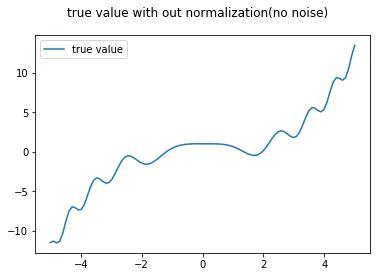

In [3]:

##main:

# question 2a:
import matplotlib.pyplot as plt
#trainX=np.array([[1,2,4],[4,21,29],[5,10,20],[2,3,7],[8,100,116],[3,4,10],[9,100,118]])
def fx(x,delta):
    return 0.1*(x**3)+(np.cos(x**2)) + np.random.normal(0,delta)
x=np.linspace(-5.0,5.0,100)
y=np.array([fx(t,0) for t in x])
plt.plot(x,y,label="true value")
plt.suptitle("true value with out normalization(no noise)")
plt.legend()
plt.show()




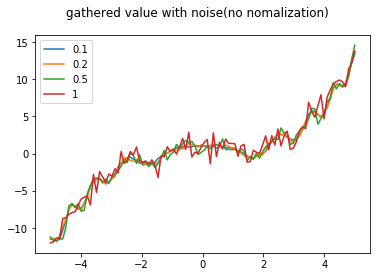

In [4]:
# question 2:

y1=np.array([fx(t,0.1) for t in x])
y2=np.array([fx(t,0.2) for t in x])
y3=np.array([fx(t,0.5) for t in x])
y4=np.array([fx(t,1) for t in x])
plt.clf()
plt.plot(x,y1,label="0.1")
plt.plot(x,y2,label="0.2")
plt.plot(x,y3,label="0.5")
plt.plot(x,y4,label="1")
plt.suptitle("gathered value with noise(no nomalization)")
plt.legend()
plt.show()

start cv at linear base function, the weight and loss are showed:   
W= [[0.108]
 [0.737]]
loss= 0.5031921536398587
W= [[-0.109]
 [ 0.982]]
loss= 0.31496914560733286
W= [[-0.038]
 [ 0.911]]
loss= 0.0687897940614612
W= [[0.134]
 [0.998]]
loss= 0.4679130085936734
W= [[-0.079]
 [ 0.776]]
loss= 0.38942578602346173
the best polynomial degree is 4,and the regularization degree lambda is: 0.100000
 the best model after cv, the loss is :0.019428


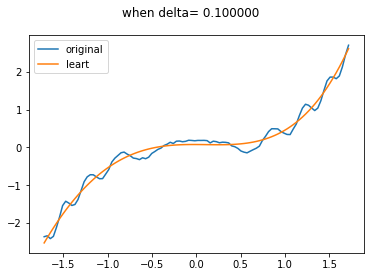

start cv at linear base function, the weight and loss are showed:   
W= [[0.106]
 [0.743]]
loss= 0.47446398545569507
W= [[-0.104]
 [ 0.981]]
loss= 0.293193385657597
W= [[-0.042]
 [ 0.913]]
loss= 0.07309317625162531
W= [[0.134]
 [1.   ]]
loss= 0.4714613586714146
W= [[-0.078]
 [ 0.78 ]]
loss= 0.3867404944158867
the best polynomial degree is 4,and the regularization degree lambda is: 0.000000
 the best model after cv, the loss is :0.021677


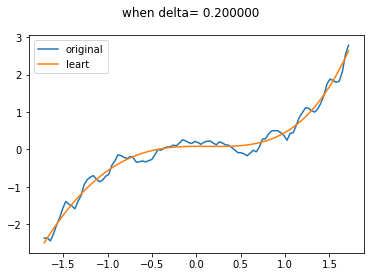

start cv at linear base function, the weight and loss are showed:   
W= [[0.104]
 [0.736]]
loss= 0.506742688020961
W= [[-0.103]
 [ 0.973]]
loss= 0.2971841169393237
W= [[-0.039]
 [ 0.906]]
loss= 0.08700189650770093
W= [[0.132]
 [0.99 ]]
loss= 0.4636449403220988
W= [[-0.079]
 [ 0.771]]
loss= 0.4071434341398744
the best polynomial degree is 5,and the regularization degree lambda is: 1.000000
 the best model after cv, the loss is :0.031768


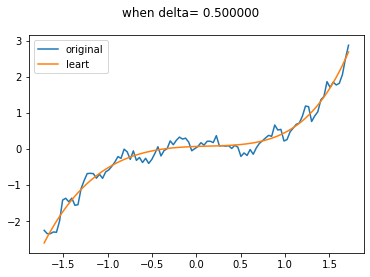

start cv at linear base function, the weight and loss are showed:   
W= [[0.104]
 [0.732]]
loss= 0.4761845261741958
W= [[-0.109]
 [ 0.973]]
loss= 0.3562121882553517
W= [[-0.031]
 [ 0.898]]
loss= 0.08875191169504162
W= [[0.137]
 [0.991]]
loss= 0.5176487684009647
W= [[-0.092]
 [ 0.747]]
loss= 0.4505252590237828
the best polynomial degree is 6,and the regularization degree lambda is: 10.000000
 the best model after cv, the loss is :0.049183


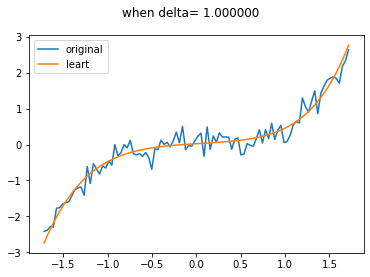

In [5]:
# try to degression
i=0
do_print=True
for y,delta in zip([y1,y2,y3,y4],[0.1,0.2,0.5,1]):
    input=np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    out=my_regression(norm(input),norm(input[:,0:-1]),1)
    plt.clf()
    plt.plot(norm(x.reshape(-1,1)),norm(y.reshape(-1,1)),label="original")
    plt.plot(norm(x.reshape(-1,1)),norm(out),label="leart")
    plt.suptitle("when delta= %f" % delta)
    plt.legend()
    plt.show()


In this section, we try to record different cv lose when have the different input.

In [9]:
# question 1c:
original_x=np.linspace(-5,5,500).T
normed_original_x=norm(original_x)
num_of_trainining=np.array([2,5,10,20,50,100,200,500])
div=np.array([0.1,0.2,0.5,1])
origin_y=np.array([[fx(t,d) for t in original_x ] for d in div ]).T
normed_original_y=norm(origin_y)
loss_dict=dict()
weight_dict=dict()
degree_dict=dict()
do_print=False
i=0
j=0
data=np.ndarray([len(num_of_trainining),len(div)],dtype=np.float)
for num in num_of_trainining:
    j=0
    for d in div:

        index=np.array([i for i in range(0,500,int(500/num))])
        index=index.astype(int)
        x=normed_original_x[index]
        y=normed_original_y[index,j]
     
        trainX=np.array([[t1,t2] for t1,t2 in zip(x,y) ])
        #print(trainX)
        #print(trainX)
        trainOut=my_regression(trainX,trainX[:,0:-1],1)
        loss_dict[(num,d)]=best_model_cv_loss[0]
        weight_dict[(num,d)]=best_model_weight[0]
        degree_dict[(num,d)]=best_model_degree[0]
        data[i,j]=best_model_cv_loss[0]
        j=j+1
    i=i+1
for i,d in enumerate(data):
    
    line='|'.join(["num of training = %3d"%num_of_trainining[i]]+[("%.3f"%x).ljust(12) for x in d])
    if i==0:
        title='|'.join(["name".ljust(len("num of training = %3d"%num_of_trainining[i]))]+[("noise=%.1f"%d).ljust(12) for d in div ])
        print(title)
        print("-"*len(title))
    print(line)



name                 |noise=0.1   |noise=0.2   |noise=0.5   |noise=1.0   
-------------------------------------------------------------------------
num of training =   2|3.501       |3.672       |3.542       |2.906       
num of training =   5|0.123       |0.134       |0.173       |0.170       
num of training =  10|0.215       |0.215       |0.155       |0.324       
num of training =  20|0.154       |0.143       |0.167       |0.206       
num of training =  50|0.059       |0.062       |0.112       |0.112       
num of training = 100|0.114       |0.114       |0.150       |0.206       
num of training = 200|0.209       |0.231       |0.202       |0.224       
num of training = 500|0.059       |0.063       |0.090       |0.094       


[18 16]
[0 1]
num of trainning data:50, noise level: 0.50


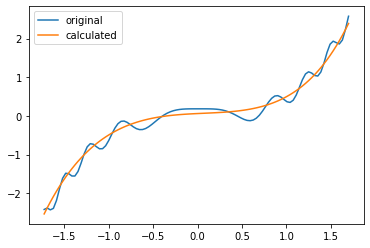

num of trainning data:50, noise level: 0.10


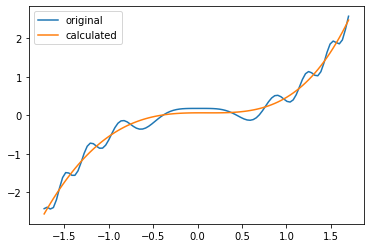

num of trainning data:2, noise level: 0.10


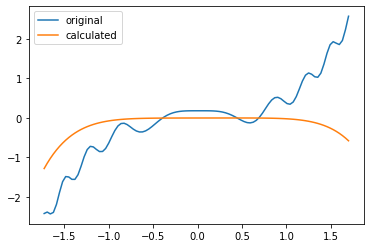

num of trainning data:2, noise level: 0.20


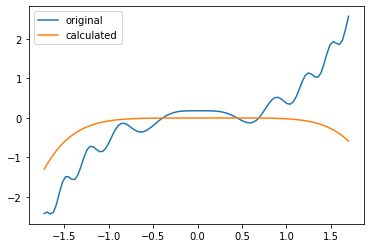

In [7]:
# now we need to choose the top 2 and the bottom 2, and plot it
sort=np.argsort(data.reshape(-1))
top2=np.array(sort[:2])
bot2=np.array(sort[-2:])
print(top2)
print(bot2)
noise_top2=div[top2%4]
n_t_top2=num_of_trainining[(top2/4).astype(int)]
noise_bot2=div[bot2%4]
n_t_bot2=num_of_trainining[(bot2/4).astype(int)]

x=normed_original_x[  [i for i in range(0,500,5)]]
y=np.array([ fx(i,0) for i in original_x ])
y=norm(y.reshape(-1,1))
y=y[ [i for i in range(0,500,5)]]
x=x.reshape(-1,1)
for n_data,n_noise in zip([n_t_top2,n_t_bot2],[noise_top2,noise_bot2]):
    for num,d in zip(n_data,n_noise):
        print("num of trainning data:%d, noise level: %.2f" %(num,d))
        plt.clf()
        plt.plot(x,y,label="original")
        fit=PolynomialFeatures(degree_dict[(num,d)])
        featureX=fit.fit_transform(x)
        plt.plot(x,np.dot(featureX,weight_dict[(num,d)]),label="calculated")
        plt.legend()
        plt.show()


In this section , we did out 

In [8]:
data=[("./airfoil_self_noise.dat",1),("yacht_hydrodynamics.data",1),("slump_test.data",3)]

for d in data:
    print(d[0])
    inputs=[]
    with open(d[0]) as f:
        for line in iter(f.readline,''):
            inputs.append(line.split())
    inputs=np.array(inputs)
    inputs=inputs.astype(np.float)
    inputs=norm(inputs)
    do_print=True
    testOut=my_regression(inputs,inputs[:,0:-d[1]],d[1])
    pass

./airfoil_self_noise.dat
start cv at linear base function, the weight and loss are showed:   
W= [[-0.004]
 [-0.561]
 [-0.373]
 [-0.5  ]
 [ 0.233]
 [-0.27 ]]
loss= 0.19427985160816902
W= [[ 0.007]
 [-0.535]
 [-0.388]
 [-0.506]
 [ 0.219]
 [-0.269]]
loss= 0.42790922103793494
W= [[ 0.02 ]
 [-0.567]
 [-0.386]
 [-0.486]
 [ 0.223]
 [-0.237]]
loss= 0.486042475931279
W= [[ 0.003]
 [-0.749]
 [-0.205]
 [-0.427]
 [ 0.244]
 [-0.376]]
loss= 1.196669590672469
W= [[-0.031]
 [-0.544]
 [-0.416]
 [-0.484]
 [ 0.208]
 [-0.261]]
loss= 0.5555629581920872
the best polynomial degree is 2,and the regularization degree lambda is: 100.000000
 the best model after cv, the loss is :0.368689
yacht_hydrodynamics.data
start cv at linear base function, the weight and loss are showed:   
W= [[-4.935e-03]
 [ 1.962e-02]
 [ 3.272e-04]
 [ 1.062e-01]
 [-9.880e-02]
 [-9.287e-02]
 [ 8.253e-01]]
loss= 0.3065022009919803
W= [[ 0.021]
 [ 0.02 ]
 [-0.004]
 [ 0.1  ]
 [-0.093]
 [-0.121]
 [ 0.827]]
loss= 0.3112507714790476
W= [[-0.0